In [50]:
import pandas as pd
#import pycaret
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

# EDA Libraries
import sweetviz as sv
from pandas_profiling import ProfileReport
import pandas_profiling

#ML Libraries
from sklearn.model_selection import train_test_split
from scipy.stats.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
import statsmodels.api as sm

#preprocessing libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler


import warnings
warnings.filterwarnings("ignore")

In [5]:
# Reads project's classes
from lib.preprocessor import Preprocessor
from lib.analyser import Analyser
from lib.utils import Performance
from lib.trainer import Trainer

# Method 1 - Training a regression model on complete dataset

In [82]:
raw_dat = pd.read_csv("data/cup98LRN.csv",na_values=" ")
raw_dat.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,NaN,NaN,3712,0,NaN,NaN,NaN,NaN,XXXX,T2,36.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,

In [83]:
# Gets some redundant variables based on variance, sparsity & common sense
redundant_vars = Analyser.get_redundant_vars(raw_dat)

# Drops redundant cols/
raw_dat = raw_dat.drop(redundant_vars, axis = 1)

In [20]:
# Gets columns which have high nan values and drop them
nan_cols = Analyser.get_nan_cols(raw_dat)

# Drops redundant cols/
raw_dat = raw_dat.drop(nan_cols, axis = 1)


In [21]:
# Gets categorical columns which have high cardinality values and drop them
cardinality_vars = Analyser.get_high_cardinality_vars(raw_dat)

# Drops redundant cols/
raw_dat = raw_dat.drop(cardinality_vars, axis = 1)


In [22]:
# Imputes the data and fills in the missing values
raw_dat = Preprocessor.fill_nans(raw_dat)

In [23]:
#To remove Categorical features
df = pd.get_dummies(raw_dat)

In [25]:
#split dat into X,y
#Removing the target variable from the dataset
X=df.drop(columns=['TARGET_D'],axis=1)
y=df['TARGET_D']

In [26]:
#Lets normalize the data before PCA as a prerequisite
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [27]:
#Lets create PCA from the scaled data
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(X)
pca_X = pd.DataFrame(data = principalComponents)

In [28]:
#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(pca_X,list(y), test_size=0.2,
                                           random_state = 42)

In [33]:
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [34]:
# Running RFE with the output number of the variable equal to 10
rfe = RFE(lm, n_features_to_select=18,step =5)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [35]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]

# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [39]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.008
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     33.02
Date:                Thu, 24 Nov 2022   Prob (F-statistic):          3.81e-114
Time:                        02:04:57   Log-Likelihood:            -2.2113e+05
No. Observations:               76329   AIC:                         4.423e+05
Df Residuals:                   76310   BIC:                         4.425e+05
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.7886      0.016     49.683      0.0

In [40]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

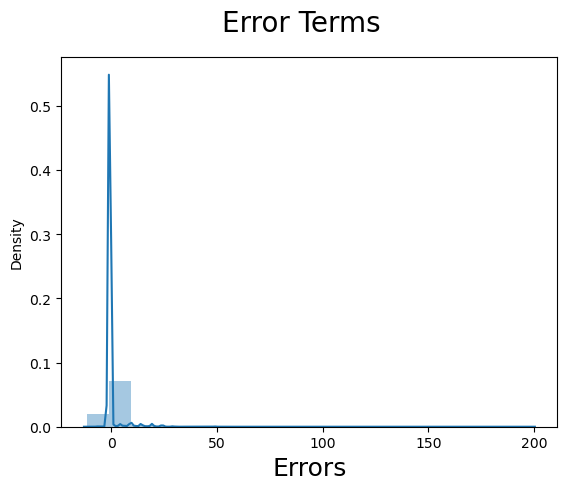

In [41]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [42]:
X_test = X_test[col]

In [43]:
y_test_pred = lm.predict(sm.add_constant(X_test))


Text(0, 0.5, 'y_pred')

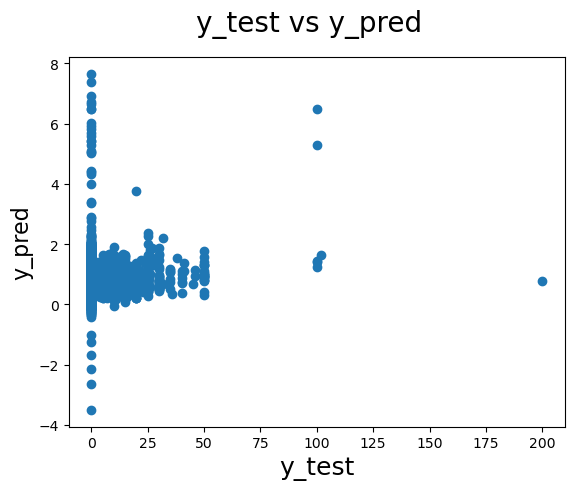

In [44]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [45]:
X_test['prediction'] = y_test_pred
X_test['donation'] = y_test

In [46]:
X_test[['donation','prediction']]

,donation,prediction
84155,0.0,1.213379
75272,0.0,0.831194
39719,0.0,0.574536
44288,0.0,0.519900
35420,0.0,0.882555
...,...,...
38584,0.0,0.692409
54025,0.0,1.032058
76819,0.0,0.547659
2549,0.0,0.947542


In [49]:
X_test[['donation','prediction']][X_test['donation']>0]

,donation,prediction
50953,10.0,0.857535
83128,10.0,0.951023
29547,10.0,0.601810
89542,15.0,1.127117
2788,9.0,1.220508
...,...,...
8350,5.0,0.226198
23598,8.0,1.302883
27894,23.0,0.909762
88417,10.0,1.180228


## Result of Method 1
As the model performs poorly on training on complete dataset, We need to train the model on only predicting donations of only the people who would probably make donations. 

# Method 2- Training only on Donor's 



In [51]:
data = pd.read_csv("data/cup98LRN.csv",na_values=" ")
data.head()

,ODATEDW,OSOURCE,TCODE,STATE,ZIP,MAILCODE,PVASTATE,DOB,NOEXCH,RECINHSE,RECP3,RECPGVG,RECSWEEP,MDMAUD,DOMAIN,CLUSTER,AGE,AGEFLAG,HOMEOWNR,CHILD03,CHILD07,CHILD12,CHILD18,NUMCHLD,INCOME,GENDER,WEALTH1,HIT,MBCRAFT,MBGARDEN,MBBOOKS,MBCOLECT,MAGFAML,MAGFEM,MAGMALE,PUBGARDN,PUBCULIN,PUBHLTH,PUBDOITY,PUBNEWFN,PUBPHOTO,PUBOPP,DATASRCE,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,STATEGOV,FEDGOV,SOLP3,SOLIH,MAJOR,WEALTH2,GEOCODE,COLLECT1,VETERANS,BIBLE,CATLG,HOMEE,PETS,CDPLAY,STEREO,PCOWNERS,PHOTO,CRAFTS,FISHER,GARDENIN,BOATS,WALKER,KIDSTUFF,CARDS,PLATES,LIFESRC,PEPSTRFL,POP901,POP902,POP903,POP90C1,POP90C2,POP90C3,POP90C4,POP90C5,ETH1,ETH2,ETH3,ETH4,ETH5,ETH6,ETH7,ETH8,ETH9,ETH10,ETH11,ETH12,ETH13,ETH14,ETH15,ETH16,AGE901,AGE902,AGE903,AGE904,AGE905,AGE906,AGE907,CHIL1,CHIL2,CHIL3,AGEC1,AGEC2,AGEC3,AGEC4,AGEC5,AGEC6,AGEC7,CHILC1,CHILC2,CHILC3,CHILC4,CHILC5,HHAGE1,HHAGE2,HHAGE3,HHN1,HHN2,HHN3,HHN4,HHN5,HHN6,MARR1,MARR2,MARR3,MARR4,HHP1,HHP2,DW1,DW2,DW3,DW4,DW5,DW6,DW7,DW8,DW9,HV1,HV2,HV3,HV4,HU1,HU2,HU3,HU4,HU5,HHD1,HHD2,HHD3,HHD4,HHD5,HHD6,HHD7,HHD8,HHD9,HHD10,HHD11,HHD12,ETHC1,ETHC2,ETHC3,ETHC4,ETHC5,ETHC6,HVP1,HVP2,HVP3,HVP4,HVP5,HVP6,HUR1,HUR2,RHP1,RHP2,RHP3,RHP4,HUPA1,HUPA2,HUPA3,HUPA4,HUPA5,HUPA6,HUPA7,RP1,RP2,RP3,RP4,MSA,ADI,DMA,IC1,IC2,IC3,IC4,IC5,IC6,IC7,IC8,IC9,IC10,IC11,IC12,IC13,IC14,IC15,IC16,IC17,IC18,IC19,IC20,IC21,IC22,IC23,HHAS1,HHAS2,HHAS3,HHAS4,MC1,MC2,MC3,TPE1,TPE2,TPE3,TPE4,TPE5,TPE6,TPE7,TPE8,TPE9,PEC1,PEC2,TPE10,TPE11,TPE12,TPE13,LFC1,LFC2,LFC3,LFC4,LFC5,LFC6,LFC7,LFC8,LFC9,LFC10,OCC1,OCC2,OCC3,OCC4,OCC5,OCC6,OCC7,OCC8,OCC9,OCC10,OCC11,OCC12,OCC13,EIC1,EIC2,EIC3,EIC4,EIC5,EIC6,EIC7,EIC8,EIC9,EIC10,EIC11,EIC12,EIC13,EIC14,EIC15,EIC16,OEDC1,OEDC2,OEDC3,OEDC4,OEDC5,OEDC6,OEDC7,EC1,EC2,EC3,EC4,EC5,EC6,EC7,EC8,SEC1,SEC2,SEC3,SEC4,SEC5,AFC1,AFC2,AFC3,AFC4,AFC5,AFC6,VC1,VC2,VC3,VC4,ANC1,ANC2,ANC3,ANC4,ANC5,ANC6,ANC7,ANC8,ANC9,ANC10,ANC11,ANC12,ANC13,ANC14,ANC15,POBC1,POBC2,LSC1,LSC2,LSC3,LSC4,VOC1,VOC2,VOC3,HC1,HC2,HC3,HC4,HC5,HC6,HC7,HC8,HC9,HC10,HC11,HC12,HC13,HC14,HC15,HC16,HC17,HC18,HC19,HC20,HC21,MHUC1,MHUC2,AC1,AC2,ADATE_2,ADATE_3,ADATE_4,ADATE_5,ADATE_6,ADATE_7,ADATE_8,ADATE_9,ADATE_10,ADATE_11,ADATE_12,ADATE_13,ADATE_14,ADATE_15,ADATE_16,ADATE_17,ADATE_18,ADATE_19,ADATE_20,ADATE_21,ADATE_22,ADATE_23,ADATE_24,RFA_2,RFA_3,RFA_4,RFA_5,RFA_6,RFA_7,RFA_8,RFA_9,RFA_10,RFA_11,RFA_12,RFA_13,RFA_14,RFA_15,RFA_16,RFA_17,RFA_18,RFA_19,RFA_20,RFA_21,RFA_22,RFA_23,RFA_24,CARDPROM,MAXADATE,NUMPROM,CARDPM12,NUMPRM12,RDATE_3,RDATE_4,RDATE_5,RDATE_6,RDATE_7,RDATE_8,RDATE_9,RDATE_10,RDATE_11,RDATE_12,RDATE_13,RDATE_14,RDATE_15,RDATE_16,RDATE_17,RDATE_18,RDATE_19,RDATE_20,RDATE_21,RDATE_22,RDATE_23,RDATE_24,RAMNT_3,RAMNT_4,RAMNT_5,RAMNT_6,RAMNT_7,RAMNT_8,RAMNT_9,RAMNT_10,RAMNT_11,RAMNT_12,RAMNT_13,RAMNT_14,RAMNT_15,RAMNT_16,RAMNT_17,RAMNT_18,RAMNT_19,RAMNT_20,RAMNT_21,RAMNT_22,RAMNT_23,RAMNT_24,RAMNTALL,NGIFTALL,CARDGIFT,MINRAMNT,MINRDATE,MAXRAMNT,MAXRDATE,LASTGIFT,LASTDATE,FISTDATE,NEXTDATE,TIMELAG,AVGGIFT,CONTROLN,TARGET_B,TARGET_D,HPHONE_D,RFA_2R,RFA_2F,RFA_2A,MDMAUD_R,MDMAUD_F,MDMAUD_A,CLUSTER2,GEOCODE2
0,8901,GRI,0,IL,61081,NaN,NaN,3712,0,NaN,NaN,NaN,NaN,XXXX,T2,36.0,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,F,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,39,34,18,10,2,1,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X,992,264,332,0,35,65,47,53,92,1,0,0,11,0,0,0,0,0,0,0,11,0,0,0,39,48,51,40,50,54,25,31,42,27,11,14,18,17,13,11,15,12,11,34,25,18,26,10,23,18,33,49,28,12,4,61,7,12,19,198,276,97,95,2,2,0,0,7,7,0,479,635,3,2,86,14,96,4,7,38,80,70,32,84,16,6,2,5,9,15,3,17,50,25,0,0,0,2,7,13,27,47,0,1,61,58,61,15,4,2,0,0,14,1,0,0,2,5,17,73,0.0,177.0,682.0,307,318,349,378,12883,13,23,23,23,15,1,0,0,1,4,25,24,26,17,2,0,0,2,28,4,51,1,46,54,3,88,8,0,0,0,0,0,0,4,1,13,14,16,2,45,56,64,50,64,44,62,53,99,0,0,9,3,8,13,9,0,3,9,3,15,19,5,4,3,0,3,41,1,0,7,13,6,5,0,4,9,4,1,3,10,2,1,7,78,2,0,120,16,10,39,21,8,4,3,5,20,3,19,4,0,0,0,18,39,0,34,23,18,16,1,4,0,23,0,0,5,1,0,0,0,0,0,2,0,3,

In [52]:
data.shape

(95412, 481)

In [53]:
#Filtering only positive donor's
raw_dat = data[data['TARGET_B'] ==1]

Doing superficial EDA using predefined libraries to get an idea about the Dataset before moving to model building

- **Pandas Profiling**

In [55]:

#EDA using pandas-profiling
profile = ProfileReport(raw_dat, minimal=True,
                        correlations={
                                "auto": {"calculate": True},
                                "pearson": {"calculate": False},
                                "spearman": {"calculate": False},
                                "kendall": {"calculate": False},
                                "phi_k": {"calculate": False},
                                "cramers": {"calculate": False},
                                        })
#Saving results to a HTML file
profile.to_file("EDA_Donors.html")

In [56]:
#Deleting the columns which have constant value
#rejected = profile.get_rejected_variables()
#rejected

In [57]:
#raw_dat.drop(columns=rejected,inplace=True,axis=1)

In [58]:
# Gets some redundant variables based on variance, sparsity & common sense
redundant_vars = Analyser.get_redundant_vars(raw_dat)

# Drops redundant cols/
raw_dat = raw_dat.drop(redundant_vars, axis = 1)
print("columns deleted are ",redundant_vars)

columns deleted are  ['CONTROLN', 'ZIP', 'ADATE_5', 'ADATE_15', 'ADATE_20', 'TARGET_B', 'RECPGVG', 'CHILD03', 'SOLP3', 'MAJOR', 'PLATES', 'RDATE_3', 'RDATE_4', 'RDATE_5', 'RAMNT_3', 'RAMNT_4', 'RAMNT_5']


In [59]:
raw_dat.shape

(4843, 464)

In [60]:
# Gets columns which have high nan values and drop them
nan_cols = Analyser.get_nan_cols(raw_dat)

# Drops redundant cols/
raw_dat = raw_dat.drop(nan_cols, axis = 1)

#print("columns deleted are ",nan_cols)

In [61]:
# Gets categorical columns which have high cardinality values and drop them
cardinality_vars = Analyser.get_high_cardinality_vars(raw_dat)

# Drops redundant cols/
raw_dat = raw_dat.drop(cardinality_vars, axis = 1)
#print("columns deleted are ",cardinality_vars)

In [62]:
# Imputes the data and fills in the missing values
raw_dat = Preprocessor.fill_nans(raw_dat)

In [63]:
df = pd.get_dummies(raw_dat)

In [65]:
#split dat into X,y
#Removing the target variable from the dataset
X=df.drop(columns=['TARGET_D'],axis=1)
y=df['TARGET_D']

#Lets normalize the data before PCA as a prerequisite
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Lets create PCA from the scaled data
pca = PCA(n_components=50)
principalComponents = pca.fit_transform(X)
pca_X = pd.DataFrame(data = principalComponents)

In [67]:
#Split the data into training and test set
X_train, X_test, y_train, y_test = train_test_split(pca_X,list(y), test_size=0.2,
                                           random_state = 42)

In [68]:
from sklearn.feature_selection import RFE
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [69]:
# Running RFE with the output number of the variable equal to 18 
#This variable count was acheived after multiple retries and checking adjusted R-sq, 
#but for the purpose of simplicity of code, its not shown 

rfe = RFE(lm, n_features_to_select=18,step =5)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [70]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))
col = X_train.columns[rfe.support_]
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [71]:
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.470
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     190.1
Date:                Thu, 24 Nov 2022   Prob (F-statistic):               0.00
Time:                        02:15:22   Log-Likelihood:                -14052.
No. Observations:                3874   AIC:                         2.814e+04
Df Residuals:                    3855   BIC:                         2.826e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         15.6136      0.147    106.479      0.0

In [72]:
y_train_pred1 = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

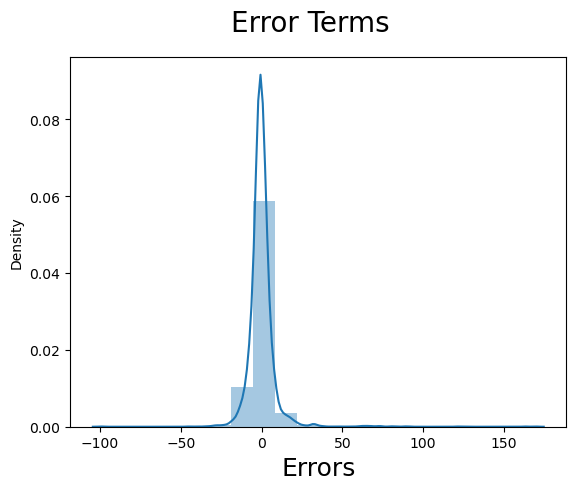

In [73]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred1), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [74]:
X_test = X_test[col]

In [75]:
y_test_pred = lm.predict(sm.add_constant(X_test))


Text(0, 0.5, 'y_pred')

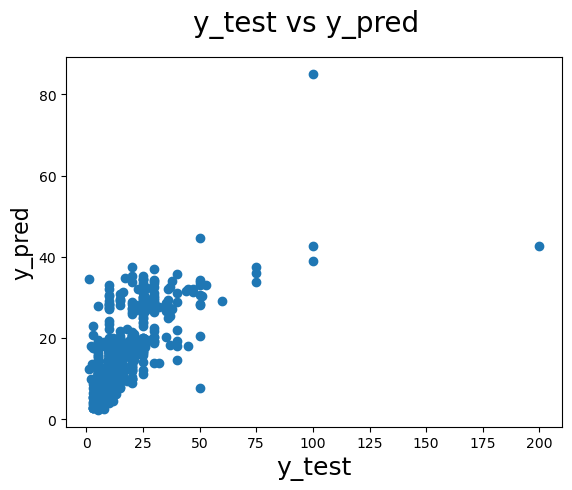

In [76]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 

In [77]:
X_test['prediction'] = y_test_pred
X_test['donation'] = y_test

In [79]:
results = X_test[['donation','prediction']]
results

,donation,prediction
3203,20.0,33.867508
1957,10.0,10.433609
1044,25.0,17.175358
2732,10.0,18.338704
1538,6.0,6.285936
...,...,...
4141,15.0,11.655548
1983,5.0,7.858191
1507,14.0,11.456396
1126,20.0,15.921646


In [81]:
#Total donation predicted
results['donation'].sum()

14925.869999999999

In [80]:
results['prediction'].sum()

14873.703642255861

## Result-  
The difference in donations is very small, and as per this output if all the donor's were sent a mail 
- costing $1
    
    - Donation Collected   = $ 14925
    - Cost of sending mail = - $ 969
   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    - Revenue Collected    = $ 13956
  
- costing $5
    - Donation Collected   = $ 14925
    - Cost of sending mail = - $4845 
   ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    - Revenue Collected    = $ 10080
    
As a rule of thumb business may mark a threshold of cost of sending mail($1 or $5) and send the mail to only those individuals whose predicted donation is more than cost of sending mail.


In [84]:

# save the model to disk
import joblib
filename = 'models/donations_model.sav'
joblib.dump(lm, filename)
 

['donation_model.sav']

In [87]:
# save the rfe features to disk
import joblib
filename = 'models/donations_model_features.csv'
joblib.dump(col, filename)

['donation_model_features.csv']